<a href="https://colab.research.google.com/github/J-o-y-y/ms_ai_school/blob/main/20230613_%EB%84%A4%EB%B2%88%EC%A7%B8_SIFT(Scale_Invariant_Feature_Transform).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SIFT(Scale-Invariant Feature Transform)

1. SIFT 객체를 생성한 후, 비디오를 불러와 프레임별로 흑백화 시킵니다.

2. SIFT를 이용해 특징점을 검출하여 시각화합니다.

3. 시각화 전에 임계값 설정과 최대 특징점 개수를 추가하여 유효한 특징점만 남깁니다.


In [7]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:

# 동영상 파일 열기
cap = cv2.VideoCapture("vtest.avi")

# SIFT 객체 생성
sift = cv2.SIFT_create()

while True:
    # 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    # 그레이스케일로 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 특징점 검출
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    # 임계값과 최대 특징점 개수 설정
    threshold = 0.1
    max_features = 100

    # 유효한 특징점 필터링
    filtered_keypoints = []
    for kp in keypoints:
        if kp.response > threshold:
            filtered_keypoints.append(kp)

    # 특징점 개수 제한
    filtered_keypoints = sorted(filtered_keypoints, key=lambda x: x.response, reverse=True)[:max_features]

    # 특징점 그리기
    frame = cv2.drawKeypoints(
        frame, filtered_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # 프레임 출력
    cv2_imshow(frame)

    # q키를 누르면 종료
    if cv2.waitKey(30) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


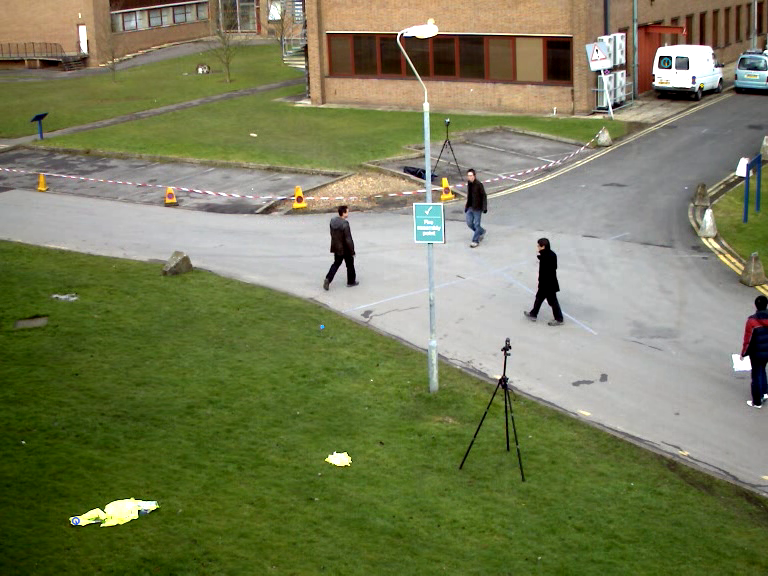